In [86]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
import keras 
import os
import sys
from keras.models import load_model

In [87]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data

def load_da_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    
    
def load_da_image2(image_path):
    import pydicom as dicom
    import matplotlib.pylab as plt

    ds = dicom.dcmread(image_path)
    
    print(ds)
    print(ds.pixel_array.shape)
    print(ds.pixel_array)
    
    noted_finding = ds[0x0008, 0x1030].value
    print(noted_finding)

    #plt.imshow(ds.pixel_array, cmap='bone')

    return ds.pixel_array, noted_finding #**well just return the array and display it outside of here
    
def check_dicom(filename): 
    # todo
    
#     print('Load file {} ...'.format(filename))
#     ds = pydicom.dcmread(filename)       
#     img = ds.pixel_array
    return img
    
    
# This function takes the numpy array output by check_dicom and 
# runs the appropriate pre-processing needed for our model input
def preprocess_image(np_image): 
    # todo
    #np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (224, 224, 3))
    np_image = np.expand_dims(np_image, axis=0)
    print("SUCCESS: IMAGE PREPROCESSED")
    print(np_image.shape)
    return np_image
    #return proc_img

# This function loads in our trained model w/ weights and compiles it 
def load_good_model():
    # todo
    model = load_model('best_final_model68.h5')
    print("Loaded H5 Model Success")
    return model

# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model
def predict_image(model, img, thresh): 
    # todo    
    
    return prediction 

In [88]:
import pandas as pd
df = pd.read_csv("Data_For_Exploration.csv")
pd.set_option("display.max.columns", None)
df.head(20)

,Unnamed: 0,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path,Cardiomegaly,Emphysema,Effusion,No Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,Pneumonia_or_Infiltration
0,0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,/data/images_001/images/00000001_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,/data/images_001/images/00000001_001.png,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,/data/images_001/images/00000001_002.png,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,/data/images_001/images/00000002_000.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,/data/images_001/images/00000003_000.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN,/data/images_001/images/00000003_001.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN,/data/images_001/images/00000003_002.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN,/data/images_001/images/00000003_003.png,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
8,8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN,/data/images_001/images/00000003_004.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN,/data/images_001/images/00000003_005.png,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


DISTRUBUTION of Pneumonia Positive XRAYS in dataset
Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays but only a fraction of them are Pneumonia positive.


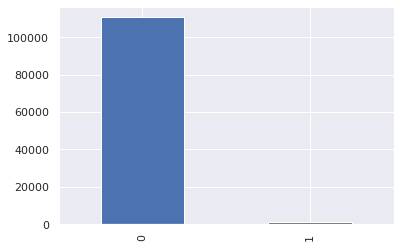

In [89]:
%matplotlib inline

print("DISTRUBUTION of Pneumonia Positive XRAYS in dataset")

df['Pneumonia'].value_counts().plot(kind='bar')

#*Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays be only a fraction of them are Pneumonia positive."

my_text = "Problem: This data set is not really effective at helping the model learn to generalize on Pneumonia. There are over 100k xrays but only a fraction of them are Pneumonia positive."

print(my_text)

DISTRIBUTION of Lung Infiltration in data set


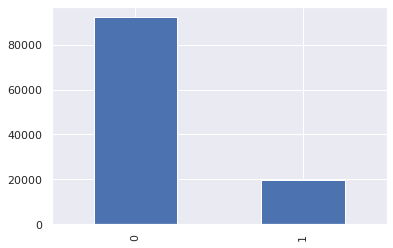

In [90]:
%matplotlib inline

print("DISTRIBUTION of Lung Infiltration in data set")

df['Infiltration'].value_counts().plot(kind='bar')

DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people under 40


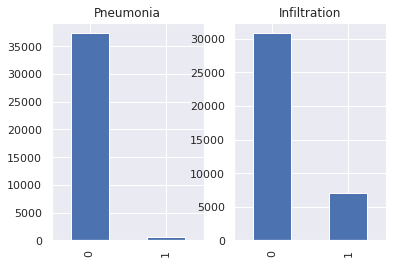

In [91]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people under 40")

df_under_40 = df[(df['Patient Age'] >= 1) & (df['Patient Age'] <= 40)]

df.head(20)

categorical_features = ["Pneumonia", "Infiltration"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_under_40[categorical_features]):
    df_under_40[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()


DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40


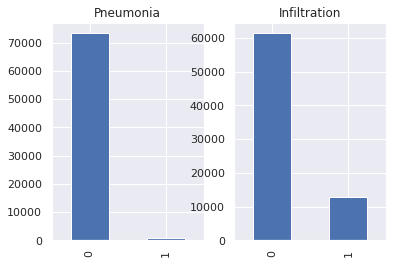

In [92]:
print("DISTRIBUTION of lung infiltration and pneumonia positive XRAYS in people over 40")

df_over_40 = df[(df['Patient Age'] > 40)]

df_over_40.head(20)

categorical_features = ["Pneumonia", "Infiltration"]
#categorical_features = ["Cardiomegaly","Emphysema","Effusion","No Finding","Hernia","Infiltration","Mass","Nodule","Atelectasis","Pneumothorax","Pleural_Thickening","Pneumonia","Fibrosis","Edema"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_over_40[categorical_features]):
    df_over_40[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()


In [93]:
from PIL import Image
import numpy as np
from skimage import transform

test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

image_data = []
image_finding = []

for idx in test_dicoms:
    image_d, finding = load_da_image2(idx)
    image_data.append(image_d)
    image_finding.append(finding)


(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.110503645592756492463169821050252582267888
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'No Finding'
(0010, 0020) Patient ID                          LO: '2'
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age                       AS: '81'
(0018, 0015) Body Part Examined                  CS: 'CHEST'
(0018, 5100) Patient Position                    CS: 'PA'
(0020, 000d) Study Instance UID                  UI: 1.3.6.1.4.1.11129.5.5.112507010803284478207522016832191866964708
(0020, 000e) Series Instance UID                 UI: 1.3.6.1.4.1.11129.5.5.112630850362182468372440828755218293352329
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows       

XRAY FINDINGS
No Finding
Cardiomegaly
Effusion
No Finding
No Finding
No Finding
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
Loaded H5 Model Success
Predict Image
[[0.7333839]]
Predict Image
[[0.7572537]]
Predict Image
[[0.72501504]]
Predict Image
[[0.7333839]]
Predict Image
[[0.7333839]]
Predict Image
[[0.7333839]]
My Trained model did not do well with these test images. According to the DICOMS none of them are pneumonia positive. But my model was giving a 70+ percent change of them being positive


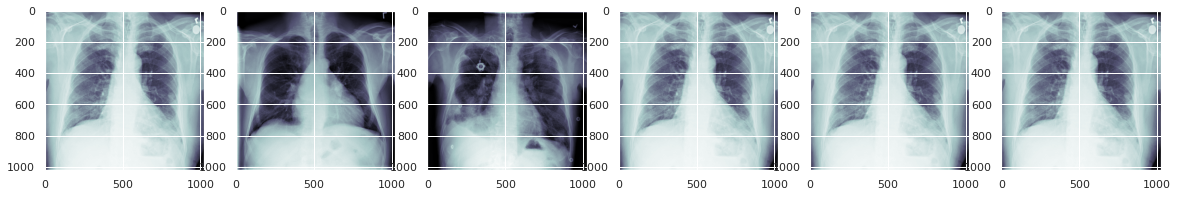

In [94]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl

plt.figure(figsize=(20,10))
columns = len(image_data)

print("XRAY FINDINGS")
for idx in image_finding:
    print(idx)

for i, image in enumerate(image_data):
    plt.subplot(len(image_data) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap='bone')

prepprocesses_images = []

for idx in image_data:
    prep_image = preprocess_image(idx)
    prepprocesses_images.append(prep_image)
    
model = load_good_model() #**well just load the model we already trained in the other notebook

for idx in prepprocesses_images:
    print("Predict Image")
    the_pred = model.predict(idx)
    print(the_pred)
    
print("My Trained model did not do well with these test images. According to the DICOMS none of them are pneumonia positive. But my model was giving a 70+ percent change of them being positive")

Lets look for my test pneumonia images
PNEUMONIA/ INFILTRATION IMAGES
[[0.65686435]]
[[0.9241782]]
[[0.92053187]]
[[0.83966386]]
[[0.6927354]]
[[0.85866684]]


"       \nplt.figure(figsize=(20,10))\ncolumns = len(pos_images)   \n        \nfor i, image in enumerate(pos_images):\n    plt.subplot(len(pos_images) / columns + 1, columns, i + 1)\n    plt.imshow(image, cmap='bone')\n"

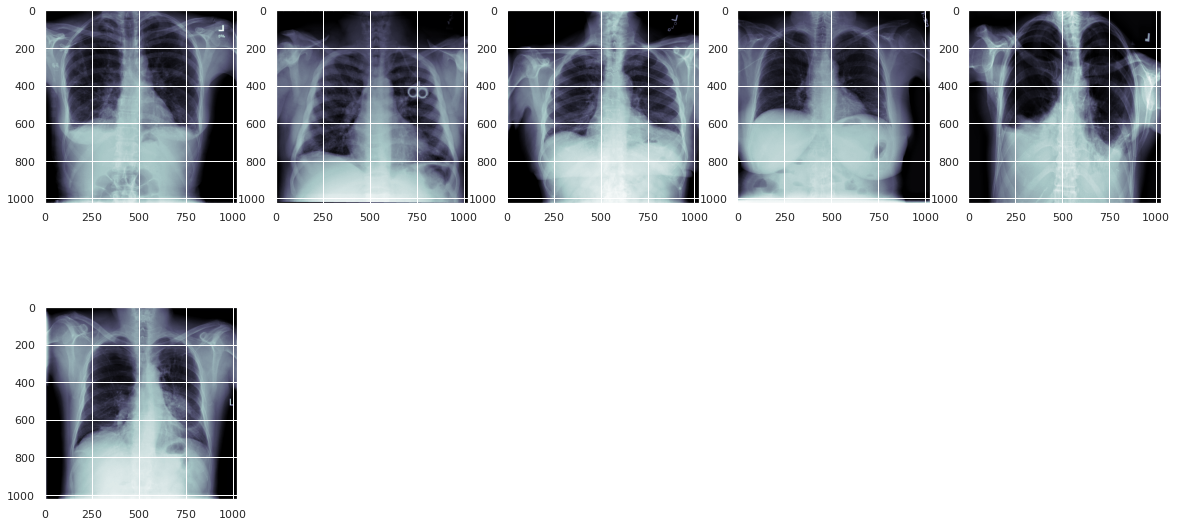

In [95]:
from PIL import Image
import numpy as np
from skimage import transform
def load_it(filename):
   np_image = Image.open(filename)
   np_image = np_image.convert('RGB')
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   pred = model.predict(np_image)
   return pred

def manual_predict(img_file):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    pred = model.predict(img_preprocessed)
    return pred
    
pos_images = []
neg_images = []

print("Lets look for my test pneumonia images")
import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    if f.startswith("negative"):
        #print(f)
        pos_images.append(f)
    if f.startswith("positive"):
        #print(f)
        neg_images.append(f)

        
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("PNEUMONIA/ INFILTRATION IMAGES")

images = []
for img_path in pos_images:
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap='bone')
    
for idx in pos_images:
    #pred = manual_predict(idx)
    pred = load_it(idx)
    print(pred)
    
'''       
plt.figure(figsize=(20,10))
columns = len(pos_images)   
        
for i, image in enumerate(pos_images):
    plt.subplot(len(pos_images) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap='bone')
'''

NON PNEUMONIA/ INFILTRATION IMAGES
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
[[0.859141]]
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
[[0.9263594]]
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
[[0.91845113]]
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
[[0.83584064]]
SUCCESS: IMAGE PREPROCESSED
(1, 224, 224, 3)
[[0.91891915]]
As illustrated in the code above. I gave the model XRAYs that it hadnt really seen before during training. And even though these are non Pneumonia images the model seems to think they have Pneumonia


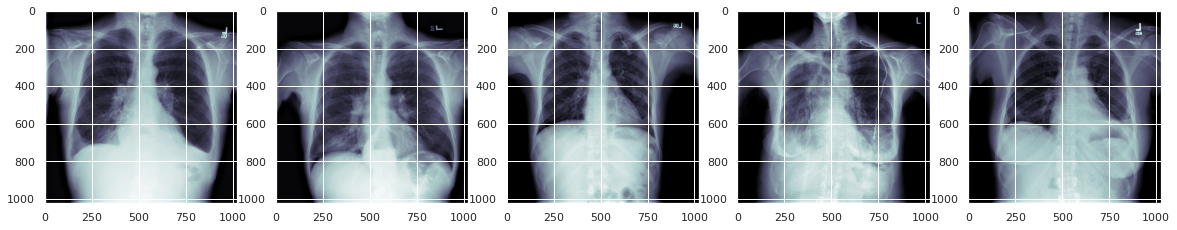

In [98]:
print("NON PNEUMONIA/ INFILTRATION IMAGES")
    
images = []
for img_path in neg_images:
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap='bone') 
    
for idx in neg_images:
    #pred = manual_predict(idx)
    #pred = load_it(idx)
    np_image = Image.open(idx)
    x = preprocess_image(np_image)
    pred = model.predict(x)
    print(pred)
    
print("As illustrated in the code above. I gave the model XRAYs that it hadnt really seen before during training. And even though these are non Pneumonia images the model seems to think they have Pneumonia")